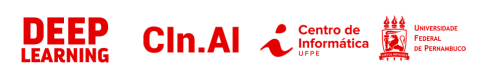

In [ ]:
! pip install spacy==3.5
! python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-02-28 15:20:53.360976: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-28 15:20:55.537335: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-28 15:20:55.538587: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could no

Spacy (https://spacy.io/) e NLTK (https://www.nltk.org/)

In [ ]:
import spacy

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
!python -m spacy info

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-02-28 15:21:16.139673: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-28 15:21:16.139820: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-28 15:21:16.139841: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentione

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
#tokenization
sentence = nlp(u'"They\'re leaving U.K. for U.S.A."')
for word in sentence:
  print(word)

"
They
're
leaving
U.K.
for
U.S.A.
"


In [ ]:
#tokenization
sentence1 = nlp(u"Hello, I am non-vegetarian, email me the menu at abc-xyz@gmai.com")
for word in sentence1:
  print(word)


Hello
,
I
am
non
-
vegetarian
,
email
me
the
menu
at
abc-xyz@gmai.com


In [ ]:
# tamanho da sentença
len(sentence1)

14

In [ ]:
vocab = set([])
for word in sentence1:
  vocab.add(word.text)

print(vocab)
print("Tamanho: ", len(vocab))

{'-', 'Hello', 'I', 'email', 'abc-xyz@gmai.com', 'menu', 'at', 'vegetarian', 'am', 'the', 'non', 'me', ','}
Tamanho:  13


Processando um texto muito longo

In [ ]:
long_text = "The son of a civil servant, Turing was educated at a top private school. \
He entered the University of Cambridge to study mathematics in 1931. After graduating \
in 1934, he was elected to a fellowship at King’s College (his college since 1931) in \
recognition of his research in probability theory. In 1936 Turing’s seminal paper \
“On Computable Numbers, with an Application to the Entscheidungsproblem [Decision Problem]” \
was recommended for publication by the American mathematical logician Alonzo Church, \
who had himself just published a paper that reached the same conclusion as Turing’s, although by a different method. Turing’s method (but not so much Church’s) had profound significance for the emerging science of computing. Later that year Turing moved to Princeton University to study for a Ph.D. in mathematical logic under Church’s direction (completed in 1938)."

In [ ]:
long_text_tokenized = nlp(long_text)
print("# Tokens: ", len(long_text_tokenized))

tokens = []
for word in long_text_tokenized:
  tokens.append(word.text)
print("# Tamanho Vocabulario: ", len(set(tokens)))

# Tokens:  161
# Tamanho Vocabulario:  101


In [ ]:
import collections
tokens_freq = collections.Counter(tokens)

In [ ]:
tokens_freq

Counter({'The': 1,
         'son': 1,
         'of': 4,
         'a': 6,
         'civil': 1,
         'servant': 1,
         ',': 5,
         'Turing': 5,
         'was': 3,
         'educated': 1,
         'at': 2,
         'top': 1,
         'private': 1,
         'school': 1,
         '.': 6,
         'He': 1,
         'entered': 1,
         'the': 5,
         'University': 2,
         'Cambridge': 1,
         'to': 5,
         'study': 2,
         'mathematics': 1,
         'in': 6,
         '1931': 2,
         'After': 1,
         'graduating': 1,
         '1934': 1,
         'he': 1,
         'elected': 1,
         'fellowship': 1,
         'King': 1,
         '’s': 6,
         'College': 1,
         '(': 3,
         'his': 2,
         'college': 1,
         'since': 1,
         ')': 3,
         'recognition': 1,
         'research': 1,
         'probability': 1,
         'theory': 1,
         'In': 1,
         '1936': 1,
         'seminal': 1,
         'paper': 2,
         '“':

In [ ]:
sorted_tokens_freq = sorted(tokens_freq.items(), key = lambda x: x[1], reverse=True)
sorted_tokens_freq[:20]

[('a', 6),
 ('.', 6),
 ('in', 6),
 ('’s', 6),
 (',', 5),
 ('Turing', 5),
 ('the', 5),
 ('to', 5),
 ('of', 4),
 ('was', 3),
 ('(', 3),
 (')', 3),
 ('for', 3),
 ('Church', 3),
 ('at', 2),
 ('University', 2),
 ('study', 2),
 ('1931', 2),
 ('his', 2),
 ('paper', 2)]

Identificando Pontuação e Stopwords

In [ ]:
text = 'A letter has been... written, asking him to be released! Have you seen it?'

In [ ]:
for i, word in enumerate(nlp(text)):
  if word.is_punct==True:
    print("{0}\t{1}".format(i, word.text))

4	...
6	,
12	!
17	?


In [ ]:
stopwords = nlp.Defaults.stop_words
len(stopwords)

326

In [ ]:
stopwords

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [ ]:
for i, word in enumerate(nlp(text)):
  if word.is_stop==True:
    print("{0}\t{1}".format(i, word.text))

0	A
2	has
3	been
8	him
9	to
10	be
13	Have
14	you
16	it


In [ ]:
len(nlp(text))

18

Segmentando sentenças...

In [ ]:
#sentence segmentation
doc = nlp("I Love U.S.A. I've been living in N.Y.C. for more than 10 years now.")
#doc = nlp("This is a sentence. This is another sentence.")

for sent in doc.sents:
    print(sent.text)

I Love U.S.A.
I've been living in N.Y.C. for more than 10 years now.


In [ ]:
#lemmatization
sentence2 = nlp(u'A letter has been written, asking him to be released')
for word in sentence2:
    print(word.text + '  ===>', word.lemma_)

A  ===> a
letter  ===> letter
has  ===> have
been  ===> be
written  ===> write
,  ===> ,
asking  ===> ask
him  ===> he
to  ===> to
be  ===> be
released  ===> release


In [ ]:
#stemming
import nltk
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokens = ['compute', 'computer', 'computed', 'computing']
for token in tokens:
    print(token + ' --> ' + stemmer.stem(token))

compute --> comput
computer --> comput
computed --> comput
computing --> comput


In [ ]:
#lemmatization
sentence3 = nlp(u'compute computer computed computing')
for word in sentence3:
    print(word.text + '  ===>', word.lemma_)

compute  ===> compute
computer  ===> computer
computed  ===> compute
computing  ===> computing


# lemmatization
https://cst.dk/tools/index.php

# Em Português

In [ ]:
!python -m spacy download pt_core_news_sm

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-02-28 15:27:02.847680: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-28 15:27:02.847794: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-28 15:27:02.847813: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentione

In [ ]:
import spacy
nlp1 = spacy.load('pt_core_news_sm')

In [ ]:
sentence4 = nlp1(u'São Paulo é a cidade mais populosa do Brasil.')
for word in sentence4:
    print(word.text + '  ===>', word.lemma_)

São  ===> São
Paulo  ===> Paulo
é  ===> ser
a  ===> o
cidade  ===> cidade
mais  ===> mais
populosa  ===> populoso
do  ===> de o
Brasil  ===> Brasil
.  ===> .
